In [1]:
import numpy as np

In [2]:
def load_DataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        # X0=1.0(常数项), X1=lineArr[0], X2=lineArr[1]
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    print('dataMatrix.shape', dataMatrix.shape)
    labelMat = np.mat(classLabels).transpose()  # 转置
    print('labelMat.shape', labelMat.shape)
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [3]:
dataArr, labelMat = load_DataSet()
gradAscent(dataArr, labelMat)

dataMatrix.shape (100, 3)
labelMat.shape (100, 1)


matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [4]:
import matplotlib.pyplot as plt

def plotBestFit(weights):
    dataMat, labelMat = load_DataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

dataMatrix.shape (100, 3)
labelMat.shape (100, 1)


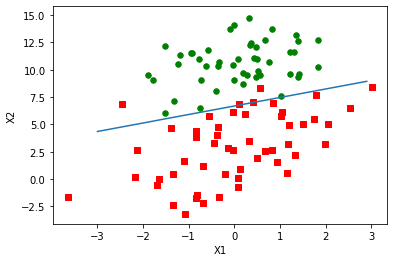

In [5]:
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights.getA())  # getA()转换为数组

In [6]:
# 随机梯度上升算法

def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

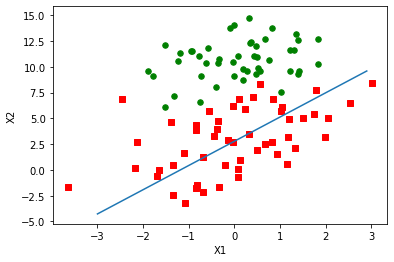

In [7]:
dataArr, labelMat = load_DataSet()
weights = stocGradAscent0(np.array(dataArr), labelMat)
plotBestFit(weights)

In [8]:
# 改进的随机梯度上升算法
def stocGradAscent1(dataMtrix, classLabels, numIter=150):
    m, n = np.shape(dataMtrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + i +j) + 0.01
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMtrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMtrix[randIndex]
            del(dataIndex[randIndex])
    return weights

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


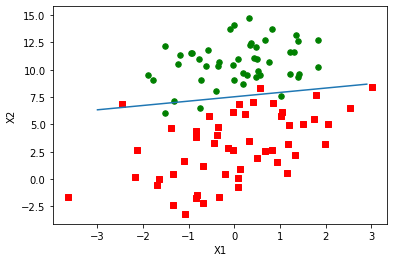

In [9]:
dataArr, labelMat = load_DataSet()
weights = stocGradAscent1(np.array(dataArr), labelMat)
plotBestFit(weights)

In [10]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    
    # 读取Train文件
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))
    
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)
    
    errorCount = 0
    numTestVec = 0.0
    
    # 读取Test文件
    for line in frTest.readlines():
        # 测试集的案例数
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        
        # 分类错误
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    
    # 错误率
    errorRate = (float(errorCount) / numTestVec)
    print('The error rate of this test is {}'.format(errorRate))
    return errorRate

def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print('After {} iterations, the average error rate is {}'.format(numTests, errorSum / float(numTests)))

In [11]:
multiTest()

C:\Users\z\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


The error rate of this test is 0.3880597014925373
The error rate of this test is 0.22388059701492538
The error rate of this test is 0.44776119402985076
The error rate of this test is 0.3880597014925373
The error rate of this test is 0.3283582089552239
The error rate of this test is 0.26865671641791045
The error rate of this test is 0.31343283582089554
The error rate of this test is 0.31343283582089554
The error rate of this test is 0.417910447761194
The error rate of this test is 0.3880597014925373
After 10 iterations, the average error rate is 0.3477611940298508
